In [1]:
import keras
from keras.applications import DenseNet121 #DenseNet121, DenseNet169, DenseNet201, ResNet50
from keras.models import Model
from keras.layers import Dense
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
from label_dict import label_dict

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Build the new model based on DenseNet121
def getmodel(num_classes=256):
    '''
    Build the new model based on DenseNet121, DenseNet169, DenseNet201
    
    Argument:
    num_classes -- (int) number of classes
    
    Return:
    model -- the new compiled model
    '''
    
    orig_model = DenseNet121(include_top=False, weights='imagenet', pooling='avg', classes=num_classes)
    densenet_out = orig_model.layers[-1].output
    out = Dense(256, activation='softmax', kernel_initializer='glorot_uniform')(densenet_out)
    model = Model(input=orig_model.input, output=out)
    model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [3]:
model = getmodel(256)

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  app.launch_new_instance()


In [4]:
#Import test dataset
X_test = np.load('test_resize_221.npy')/255.
y_test = np.load('test.npy')[:, 0]

In [5]:
model.load_weights('DenseNet121_transfer.hdf5')

In [6]:
x = np.load('orig_data.npy')

In [10]:
eve_class_img = np.zeros((256,1))

for i in range(x[:,0].shape[0]):
    eve_class_img[x[:,0][i]] += 1

In [12]:
ratio = eve_class_img/x.shape[0]

In [14]:
pred = model.predict(X_test)
max_prob = np.max(pred, axis=1, keepdims=True)
index = np.where(pred == max_prob)[1]
num_correct_pred = np.count_nonzero(index == y_test)

print('The test accuracy is: %.2f' % (num_correct_pred/float(X_test.shape[0])*100) + '%')

The test accuracy is: 61.37%


In [15]:
acc_class = np.zeros((256,1))

for i in range(y_test.shape[0]):
    if index[i] == y_test[i]:
        acc_class[y_test[i]] += 1

In [17]:
acc_per_class = acc_class/eve_class_img

In [20]:
a = np.hstack((eve_class_img, acc_per_class))

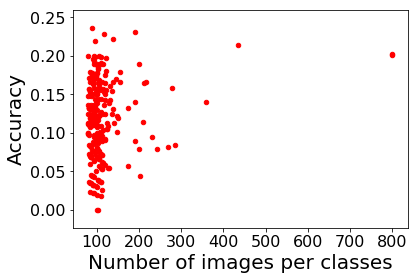

In [56]:
plt.scatter(a[:,0], a[:,1], s = 20, color='red', marker='o')
plt.ylabel('Accuracy', size = 20)
plt.xlabel('Number of images per classes', size = 20)
plt.yticks(size = 16)
plt.xticks(size=16)
plt.axis('auto')
plt.show()